# World wide Covid-19 case details

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Creating below functions to simplify the redundant process

In [467]:
# function for extracting the number of tables in a web site
def extract (url):
    response=requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    global ws 
    ws = soup.find_all("table")
    print("number of tables in web site assigned to ws = ", len(ws));

In [468]:
# function to replace null values to 0 and removing elements like "+","," and "%" from the dataset
def replace (dataframe):
    dataframe.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    dataframe.replace(np.nan,0, inplace=True)
    for label,content in dataframe.items():
        dataframe[label] = dataframe[label].apply(lambda content: str(content).replace("%",""))
        dataframe[label] = dataframe[label].apply(lambda content: str(content).replace("+",""))
        dataframe[label] = dataframe[label].apply(lambda content: str(content).replace(",",""))
    return

In [469]:
extract("https://www.worldometers.info/coronavirus/")

number of tables in web site assigned to ws =  2


In [470]:
co=ws[0]

In [471]:
# extraction of relavent column details
country=[]
total_cases=[]
new_cases=[]
total_deaths=[]
new_deaths=[]
total_recovered=[]
active_cases=[]
serious_critical=[]
total_cases_per_1m_pop=[]
deaths_per_1m_pop=[]
total_tests=[]
tests_per_1m_pop=[]

rows=co.find_all("tr")[9:-8]
for row in rows:
    col=row.find_all("td")
    country.append(col[0].text.strip())
    total_cases.append(col[1].text.strip())
    new_cases.append(col[2].text.strip())
    total_deaths.append(col[3].text.strip())
    new_deaths.append(col[4].text.strip())
    total_recovered.append(col[5].text.strip())
    active_cases.append(col[6].text.strip())
    serious_critical.append(col[7].text.strip())
    total_cases_per_1m_pop.append(col[8].text.strip())
    deaths_per_1m_pop.append(col[9].text.strip())
    total_tests.append(col[10].text.strip())
    tests_per_1m_pop.append(col[11].text.strip())
print(country)

['USA', 'Spain', 'Italy', 'UK', 'Russia', 'France', 'Germany', 'Brazil', 'Turkey', 'Iran', 'Canada', 'Peru', 'India', 'Belgium', 'Netherlands', 'Saudi Arabia', 'Ecuador', 'Switzerland', 'Mexico', 'Portugal', 'Pakistan', 'Sweden', 'Chile', 'Ireland', 'Singapore', 'Belarus', 'Qatar', 'Israel', 'UAE', 'Austria', 'Japan', 'Poland', 'Romania', 'Ukraine', 'Indonesia', 'Bangladesh', 'S. Korea', 'Philippines', 'Denmark', 'Serbia', 'Colombia', 'Dominican Republic', 'South Africa', 'Norway', 'Czechia', 'Egypt', 'Panama', 'Australia', 'Kuwait', 'Malaysia', 'Finland', 'Morocco', 'Argentina', 'Algeria', 'Kazakhstan', 'Moldova', 'Bahrain', 'Luxembourg', 'Afghanistan', 'Nigeria', 'Hungary', 'Ghana', 'Thailand', 'Oman', 'Armenia', 'Greece', 'Iraq', 'Uzbekistan', 'Cameroon', 'Azerbaijan', 'Croatia', 'Bolivia', 'Bosnia and Herzegovina', 'Guinea', 'Bulgaria', 'Iceland', 'Cuba', 'Estonia', 'Honduras', 'North Macedonia', 'Ivory Coast', 'Senegal', 'New Zealand', 'Slovakia', 'Slovenia', 'Lithuania', 'Djibout

In [472]:
df=pd.DataFrame(list(zip(country, total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious_critical,total_cases_per_1m_pop,deaths_per_1m_pop,total_tests,tests_per_1m_pop)), columns=["Country","Total_Cases","New_Cases","total_deaths",
"new_deaths","total_recovered","active_cases","serious_critical","total_cases_per_1m_pop","deaths_per_1m_pop","total_tests","tests_per_1m_pop"])
df

,Country,Total_Cases,New_Cases,total_deaths,new_deaths,total_recovered,active_cases,serious_critical,total_cases_per_1m_pop,deaths_per_1m_pop,total_tests,tests_per_1m_pop
0,USA,"1,292,879",+256,"76,942",+14,"217,251","998,686","16,995","3,906",232,"8,314,419","25,119"
1,Spain,"256,855",,"26,070",,"163,919","66,866","2,075","5,494",558,"1,932,455","41,332"
2,Italy,"215,858",,"29,958",,"96,276","89,624","1,311","3,570",495,"2,381,288","39,385"
3,UK,"206,715",,"30,615",,N/A,"175,756","1,559","3,045",451,"1,534,533","22,605"
4,Russia,"177,160",,"1,625",,"23,803","151,732","2,300","1,214",11,"4,803,192","32,913"
...,...,...,...,...,...,...,...,...,...,...,...,...
209,St. Barth,6,,,,6,0,,607,,,
210,Western Sahara,6,,,,5,1,,10,,,
211,Anguilla,3,,,,3,0,,200,,,
212,Saint Pierre Miquelon,1,,,,,1,,173,,,


In [473]:
replace(df)
df

,Country,Total_Cases,New_Cases,total_deaths,new_deaths,total_recovered,active_cases,serious_critical,total_cases_per_1m_pop,deaths_per_1m_pop,total_tests,tests_per_1m_pop
0,USA,1292879,256,76942,14,217251,998686,16995,3906,232,8314419,25119
1,Spain,256855,0,26070,0,163919,66866,2075,5494,558,1932455,41332
2,Italy,215858,0,29958,0,96276,89624,1311,3570,495,2381288,39385
3,UK,206715,0,30615,0,N/A,175756,1559,3045,451,1534533,22605
4,Russia,177160,0,1625,0,23803,151732,2300,1214,11,4803192,32913
...,...,...,...,...,...,...,...,...,...,...,...,...
209,St. Barth,6,0,0,0,6,0,0,607,0,0,0
210,Western Sahara,6,0,0,0,5,1,0,10,0,0,0
211,Anguilla,3,0,0,0,3,0,0,200,0,0,0
212,Saint Pierre Miquelon,1,0,0,0,0,1,0,173,0,0,0


In [474]:
# creating a temporary column to calculate total_recovered cases and replace n/a to 0
df["total_recovered_new"]=df["total_recovered"]
df["total_recovered_new"].replace("N/A",0, inplace=True)

In [475]:
# converting to interger for calculation purpose
df[["Total_Cases","total_deaths","total_recovered_new","active_cases"]]=df[["Total_Cases","total_deaths","total_recovered_new","active_cases"]].astype(int)
df.dtypes

Country                   object
Total_Cases                int32
New_Cases                 object
total_deaths               int32
new_deaths                object
total_recovered           object
active_cases               int32
serious_critical          object
total_cases_per_1m_pop    object
deaths_per_1m_pop         object
total_tests               object
tests_per_1m_pop          object
total_recovered_new        int32
dtype: object

In [476]:
#calculating the total recovered cases
df["total_recovered_updated"] = df["Total_Cases"] - df["total_deaths"] - df["active_cases"]

In [477]:
# validating the total recovered calculation is correct
df.query("total_recovered_updated != total_recovered_new")

,Country,Total_Cases,New_Cases,total_deaths,new_deaths,total_recovered,active_cases,serious_critical,total_cases_per_1m_pop,deaths_per_1m_pop,total_tests,tests_per_1m_pop,total_recovered_new,total_recovered_updated
3,UK,206715,0,30615,0,N/A,175756,1559,3045,451,1534533,22605,0,344
14,Netherlands,41774,0,5288,0,N/A,36236,584,2438,309,249655,14570,0,250


In [478]:
# droping the invalid total recovered cases columns
df.drop(["total_recovered_new","total_recovered"],axis=1,inplace=True)

In [479]:
df[["New_Cases","new_deaths","total_tests","serious_critical"]]=df[["New_Cases","new_deaths","total_tests","serious_critical"]].astype(int)
df[["total_cases_per_1m_pop","deaths_per_1m_pop","tests_per_1m_pop"]]=df[["total_cases_per_1m_pop","deaths_per_1m_pop","tests_per_1m_pop"]].astype(float)
df.dtypes

Country                     object
Total_Cases                  int32
New_Cases                    int32
total_deaths                 int32
new_deaths                   int32
active_cases                 int32
serious_critical             int32
total_cases_per_1m_pop     float64
deaths_per_1m_pop          float64
total_tests                  int32
tests_per_1m_pop           float64
total_recovered_updated      int32
dtype: object

### Adding engineering features

mortality_rate is a measure of number of death cases scaled by size of that population

recovery_rate is a measure of number of cured cases scaled by size of that population

In [480]:
df["recovery_rate"] = np.where(df["total_recovered_updated"] > 0,(df["Total_Cases"]/df["total_recovered_updated"]),0)

In [481]:
df["mortality_rate"] = np.where(df["total_deaths"] > 0,(df["Total_Cases"]/df["total_deaths"]),0)

In [482]:
df.dtypes

Country                     object
Total_Cases                  int32
New_Cases                    int32
total_deaths                 int32
new_deaths                   int32
active_cases                 int32
serious_critical             int32
total_cases_per_1m_pop     float64
deaths_per_1m_pop          float64
total_tests                  int32
tests_per_1m_pop           float64
total_recovered_updated      int32
recovery_rate              float64
mortality_rate             float64
dtype: object

In [483]:
# round to two decimal places
pd.options.display.float_format = '{:.2f}'.format

In [484]:
df

,Country,Total_Cases,New_Cases,total_deaths,new_deaths,active_cases,serious_critical,total_cases_per_1m_pop,deaths_per_1m_pop,total_tests,tests_per_1m_pop,total_recovered_updated,recovery_rate,mortality_rate
0,USA,1292879,256,76942,14,998686,16995,3906.00,232.00,8314419,25119.00,217251,5.95,16.80
1,Spain,256855,0,26070,0,66866,2075,5494.00,558.00,1932455,41332.00,163919,1.57,9.85
2,Italy,215858,0,29958,0,89624,1311,3570.00,495.00,2381288,39385.00,96276,2.24,7.21
3,UK,206715,0,30615,0,175756,1559,3045.00,451.00,1534533,22605.00,344,600.92,6.75
4,Russia,177160,0,1625,0,151732,2300,1214.00,11.00,4803192,32913.00,23803,7.44,109.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,St. Barth,6,0,0,0,0,0,607.00,0.00,0,0.00,6,1.00,0.00
210,Western Sahara,6,0,0,0,1,0,10.00,0.00,0,0.00,5,1.20,0.00
211,Anguilla,3,0,0,0,0,0,200.00,0.00,0,0.00,3,1.00,0.00
212,Saint Pierre Miquelon,1,0,0,0,1,0,173.00,0.00,0,0.00,0,0.00,0.00


In [485]:
df.corr(method="pearson")

,Total_Cases,New_Cases,total_deaths,new_deaths,active_cases,serious_critical,total_cases_per_1m_pop,deaths_per_1m_pop,total_tests,tests_per_1m_pop,total_recovered_updated,recovery_rate,mortality_rate
Total_Cases,1.00,0.11,0.94,0.06,0.98,0.93,0.17,0.25,0.90,0.07,0.81,0.12,-0.02
New_Cases,0.11,1.00,0.09,0.86,0.10,0.10,-0.04,-0.02,0.07,-0.06,0.09,-0.01,-0.03
total_deaths,0.94,0.09,1.00,0.06,0.90,0.85,0.20,0.39,0.82,0.08,0.79,0.28,-0.05
new_deaths,0.06,0.86,0.06,1.00,0.05,0.06,-0.02,-0.01,0.03,-0.04,0.06,-0.01,-0.03
active_cases,0.98,0.10,0.90,0.05,1.00,0.91,0.14,0.20,0.87,0.06,0.68,0.15,-0.01
serious_critical,0.93,0.10,0.85,0.06,0.91,1.00,0.13,0.19,0.80,0.04,0.75,0.06,-0.03
total_cases_per_1m_pop,0.17,-0.04,0.20,-0.02,0.14,0.13,1.00,0.71,0.16,0.48,0.20,0.08,0.18
deaths_per_1m_pop,0.25,-0.02,0.39,-0.01,0.20,0.19,0.71,1.00,0.24,0.27,0.31,0.22,-0.09
total_tests,0.90,0.07,0.82,0.03,0.87,0.80,0.16,0.24,1.00,0.14,0.78,0.11,-0.00
tests_per_1m_pop,0.07,-0.06,0.08,-0.04,0.06,0.04,0.48,0.27,0.14,1.00,0.10,0.03,0.17


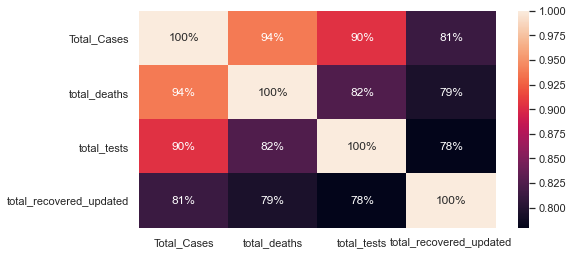

In [486]:
f, ax = plt.subplots(figsize=(8,4))
sns.heatmap(df[["Total_Cases","total_deaths","total_tests","total_recovered_updated"]].corr(), annot=True,fmt="0.0%")

#### Following are the inference :
As the total cases increases total deaths and recovery cases also increases, however recovery case are slightly less comapared
death cases.

As the total_test increases total_cases increases

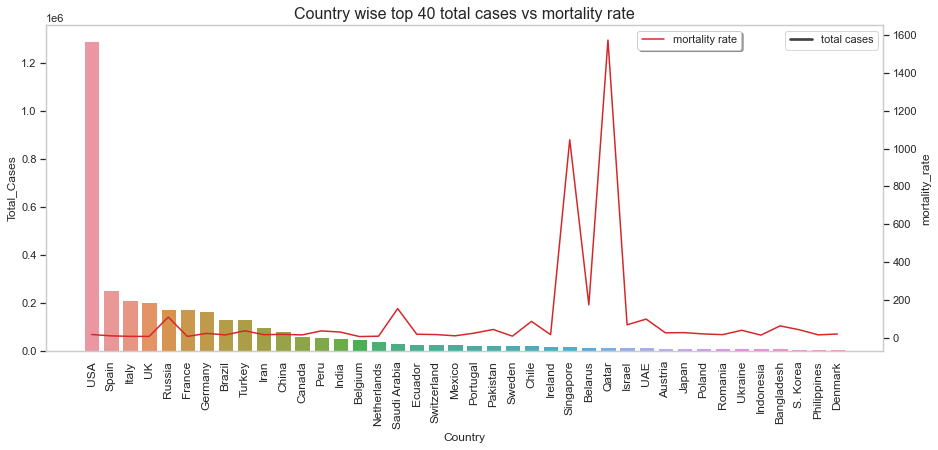

In [487]:
df_plot =  df.sort_values("Total_Cases",ascending=False).head(40)
fig, x1 = plt.subplots(figsize=(15,6))
x1.grid(False)
x1.set_title('Country wise top 40 total cases vs mortality rate', fontsize=16)
x1 = sns.barplot(x="Country",
                         y="Total_Cases",
                         data = df_plot
                         )

plt.xticks(fontsize=12, rotation=90)
x1.legend(['total cases'])
#specify we want to share the same x-axis
x2 = x1.twinx()
x2.grid(False)
color='tab:red'
#line plot creation
x2 = sns.lineplot(x='Country', y='mortality_rate', data = df_plot,sort = False,color=color)
x2.legend(['mortality rate'],loc='upper left', bbox_to_anchor=(0.7, 1.0), shadow=True, ncol=2)
#show plot
plt.show()

### Following are the inference: - Top 40  total cases vs mortality:

#### Higher the mortality rate means less deaths when compared to total cases.

USA, Spain, Italy, UK and Russia are the top 5 countries of highest number of covid cases in the world

Singapore,Qatar,UAE,Saudi Arabia and Russia have better mortality rate compared to total cases

UK,Italy,Spain and USA have less mortality rate (comparitively high death rate) compared to total cases.

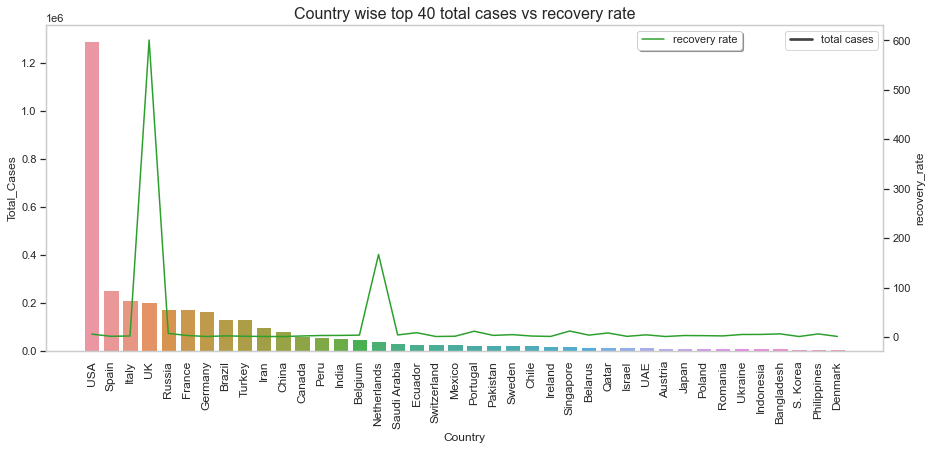

In [488]:
df_plot =  df.sort_values("Total_Cases",ascending=False).head(40)
fig, x1 = plt.subplots(figsize=(15,6))
x1.grid(False)
x1.set_title('Country wise top 40 total cases vs recovery rate', fontsize=16)
x1 = sns.barplot(x="Country",
                         y="Total_Cases",
                         data = df_plot
                         )
plt.xticks(fontsize=12, rotation=90)
x1.legend(['total cases'])
#specify we want to share the same x-axis
x2 = x1.twinx()
x2.grid(False)
color= 'tab:green'
#line plot creation
x2 = sns.lineplot(x='Country', y='recovery_rate', data = df_plot,sort = False,color=color)
x2.legend(['recovery rate'],loc='upper left', bbox_to_anchor=(0.7, 1.00), shadow=True, ncol=2)
#show plot
plt.show()

### Following are the inference: - Top 40 total cases vs recovery rate:

#### Higher the recovery rate means less recovery cases when compared to total cases.

UK,Netherlands,Ecuador,Portugal,Singapore and Qatar have worst recovery rate compared to total cases

S.Korea,Mexico,Switzerland and Ireland have better recovery rate (high cured cases) compared to total cases.

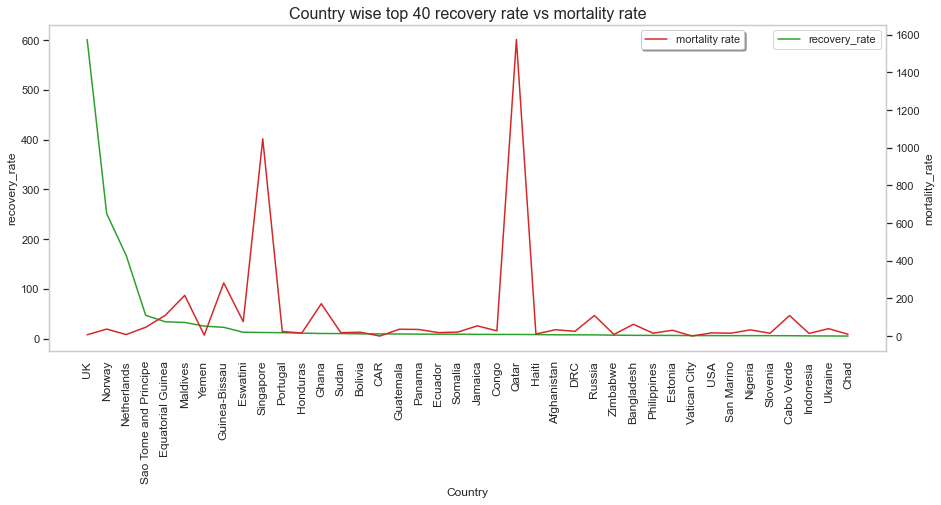

In [489]:
df_plot =  df.sort_values("recovery_rate",ascending=False).head(40)
fig, x1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
x1.grid(False)
x1.set_title('Country wise top 40 recovery rate vs mortality rate', fontsize=16)
x1 = sns.lineplot(x="Country",
                         y="recovery_rate",
                         data = df_plot,color=color,sort=False
                         )
plt.xticks(fontsize=12, rotation=90)
x1.legend(['recovery_rate'])
#specify we want to share the same x-axis
x2 = x1.twinx()
x2.grid(False)
color = 'tab:red'
#line plot creation
x2 = sns.lineplot(x='Country', y='mortality_rate', data = df_plot,sort = False,color=color)
x2.legend(['mortality rate'],loc='upper left', bbox_to_anchor=(0.7, 1.00), shadow=True, ncol=2)
#show plot
plt.show()

## Conclusion:
Certain countries have less mortality rate (high deaths) and high recovery rate (less recovery cases) like UK,norway and netherlands are worst effected need to check on recovery rate.

Certain countries have higher mortality rate (less deaths) and comparitively less recovery rate (high recovery cases) like Qatar,Singapore,Russia,Ghana and Maldives are good in controlling the number of death cases and have progressive rocovery status.

Over all as total cases increases the number of deaths increases compared to recovery cases.


# India: State wise covid-19 cases details

In [526]:
# calling function to read and extract the number of tables in the web site
extract("https://www.mohfw.gov.in/")

number of tables in web site assigned to ws =  1


In [501]:
co=ws[0]

Additional details about the columns : 
Name of state field includes Union territory,Cured field includes migrated 
& dischanrged and confirmed cases include 111 foreign nationals

In [502]:
Name_of_state = []
Total_confirmed_cases = []
Cured = []
Death = []
rows=co.find_all("tr")[1:-3]
for row in rows:
    col=row.find_all("td")
    Name_of_state.append(col[1].text.strip())
    Total_confirmed_cases.append(col[2].text.strip())
    Cured.append(col[3].text.strip())
    Death.append(col[4].text.strip())
print(Name_of_state)

['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadar Nagar Haveli', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telengana', 'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal']


In [503]:
# to find the rows selections
rows=co.find_all("tr")[1:-3]
print(rows)

[<tr>
<td>1</td>
<td>Andaman and Nicobar Islands</td>
<td>33</td>
<td>33</td>
<td>0</td>
</tr>, <tr>
<td>2</td>
<td>Andhra Pradesh</td>
<td>1847</td>
<td>780</td>
<td>38</td>
</tr>, <tr>
<td>3</td>
<td>Arunachal Pradesh</td>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>, <tr>
<td>4</td>
<td>Assam</td>
<td>54</td>
<td>34</td>
<td>1</td>
</tr>, <tr>
<td>5</td>
<td>Bihar</td>
<td>550</td>
<td>246</td>
<td>5</td>
</tr>, <tr>
<td>6</td>
<td>Chandigarh</td>
<td>135</td>
<td>21</td>
<td>1</td>
</tr>, <tr>
<td>7</td>
<td>Chhattisgarh</td>
<td>59</td>
<td>38</td>
<td>0</td>
</tr>, <tr>
<td>8</td>
<td>Dadar Nagar Haveli</td>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>, <tr>
<td>9</td>
<td>Delhi</td>
<td>5980</td>
<td>1931</td>
<td>66</td>
</tr>, <tr>
<td>10</td>
<td>Goa</td>
<td>7</td>
<td>7</td>
<td>0</td>
</tr>, <tr>
<td>11</td>
<td>Gujarat</td>
<td>7012</td>
<td>1709</td>
<td>425</td>
</tr>, <tr>
<td>12</td>
<td>Haryana</td>
<td>625</td>
<td>260</td>
<td>7</td>
</tr>, <tr>
<td>13</td>
<td>Himachal Prades

In [504]:
df1= pd.DataFrame(list(zip(Name_of_state,Total_confirmed_cases,Cured,Death)),columns = ["Name_of_state","Total_confirmed_cases","Cured","Death"])
df1

,Name_of_state,Total_confirmed_cases,Cured,Death
0,Andaman and Nicobar Islands,33,33,0
1,Andhra Pradesh,1847,780,38
2,Arunachal Pradesh,1,1,0
3,Assam,54,34,1
4,Bihar,550,246,5
5,Chandigarh,135,21,1
6,Chhattisgarh,59,38,0
7,Dadar Nagar Haveli,1,0,0
8,Delhi,5980,1931,66
9,Goa,7,7,0


In [505]:
df1.dtypes

Name_of_state            object
Total_confirmed_cases    object
Cured                    object
Death                    object
dtype: object

In [506]:
#converting to integer data type
df1[["Total_confirmed_cases","Cured","Death"]]=df1[["Total_confirmed_cases","Cured","Death"]].astype(int)

In [507]:
#summary of the number of NaN values in a column
df1.isnull().sum()

Name_of_state            0
Total_confirmed_cases    0
Cured                    0
Death                    0
dtype: int64

In [508]:
# Adding Engineering features
df1["recovery_rate"] = np.where(df1["Cured"]>0,df1["Total_confirmed_cases"]/df1["Cured"],0)
df1["mortality_rate"]= np.where(df1["Death"]>0,df1["Total_confirmed_cases"]/df1["Death"],0)
df1["active_cases"]= df1["Total_confirmed_cases"] - df1["Cured"] - df1["Death"]
df1

,Name_of_state,Total_confirmed_cases,Cured,Death,recovery_rate,mortality_rate,active_cases
0,Andaman and Nicobar Islands,33,33,0,1.00,0.00,0
1,Andhra Pradesh,1847,780,38,2.37,48.61,1029
2,Arunachal Pradesh,1,1,0,1.00,0.00,0
3,Assam,54,34,1,1.59,54.00,19
4,Bihar,550,246,5,2.24,110.00,299
5,Chandigarh,135,21,1,6.43,135.00,113
6,Chhattisgarh,59,38,0,1.55,0.00,21
7,Dadar Nagar Haveli,1,0,0,0.00,0.00,1
8,Delhi,5980,1931,66,3.10,90.61,3983
9,Goa,7,7,0,1.00,0.00,0


In [509]:
df1.corr(method='pearson')

,Total_confirmed_cases,Cured,Death,recovery_rate,mortality_rate,active_cases
Total_confirmed_cases,1.00,0.94,0.92,0.06,0.08,1.00
Cured,0.94,1.00,0.82,-0.00,0.17,0.90
Death,0.92,0.82,1.00,0.06,-0.12,0.92
recovery_rate,0.06,-0.00,0.06,1.00,-0.03,0.07
mortality_rate,0.08,0.17,-0.12,-0.03,1.00,0.06
active_cases,1.00,0.90,0.92,0.07,0.06,1.00


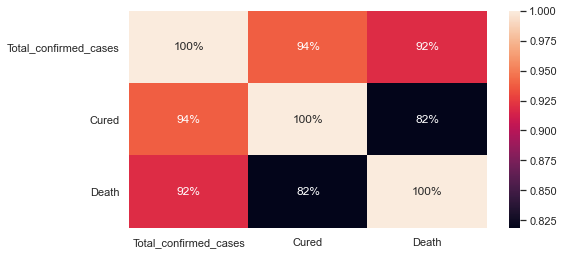

In [510]:
f, ax = plt.subplots(figsize=(8,4))
sns.heatmap(df1[["Total_confirmed_cases","Cured","Death"]].corr(), annot=True,fmt="0.0%")

#### From the above we can infer :
As the total cases increases total deaths and recovery cases also increases, however recovery case are slightly more comapared
death cases.

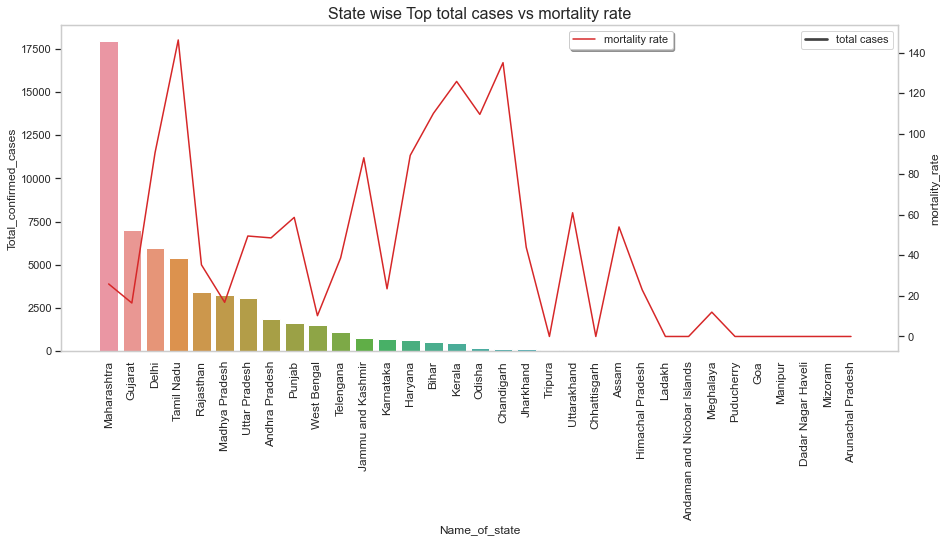

In [511]:
df_plot =  df1.sort_values("Total_confirmed_cases",ascending=False)
fig, x1 = plt.subplots(figsize=(15,6))
x1.grid(False)
x1.set_title('State wise Top total cases vs mortality rate', fontsize=16)
x1 = sns.barplot(x="Name_of_state",
                         y="Total_confirmed_cases",
                         data = df_plot
                         )

plt.xticks(fontsize=12, rotation=90)
x1.legend(['total cases'])
#specify we want to share the same x-axis
x2 = x1.twinx()
x2.grid(False)
color='tab:red'
#line plot creation
x2 = sns.lineplot(x='Name_of_state', y='mortality_rate', data = df_plot,sort = False,color=color)
x2.legend(['mortality rate'],loc='upper left', bbox_to_anchor=(0.6, 1.0), shadow=True, ncol=2)
#show plot
plt.show()

### Following are the inference: - state total cases vs mortality:

#### Higher the mortality rate means less deaths when compared to total cases.

Maharashtra, Gujarat, Delhi, Tamil Nadu and Rajasthan are the top 5 countries of highest number of covid cases in the world

Bihar,Tamil Nadu,Delhi, J&K and Kerala have better mortality rate compared to total cases

West Bengal,Gujarat and Madhya Pradesh have less mortality rate (comparitively high death rate) compared to total cases.

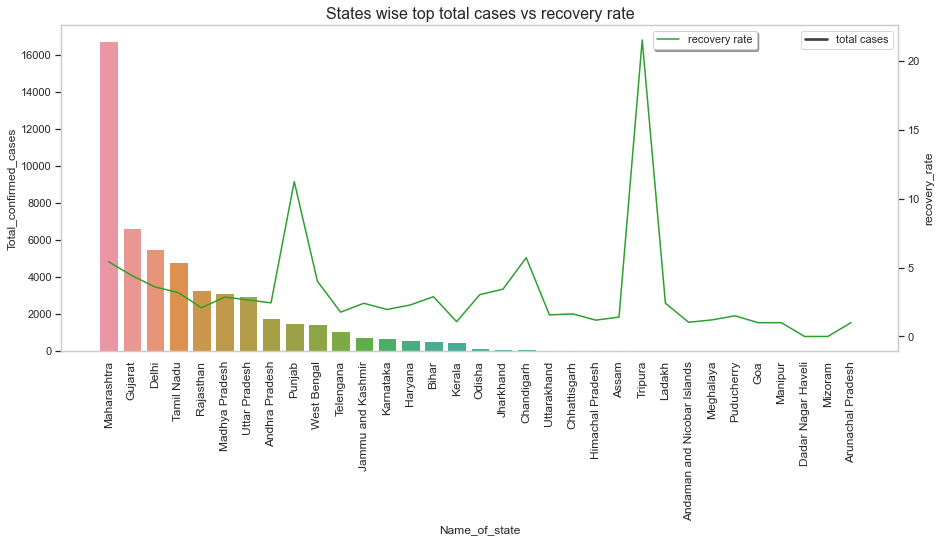

In [396]:
df_plot =  df1.sort_values("Total_confirmed_cases",ascending=False).head(40)
fig, x1 = plt.subplots(figsize=(15,6))
x1.grid(False)
x1.set_title('States wise top total cases vs recovery rate', fontsize=16)
x1 = sns.barplot(x="Name_of_state",
                         y="Total_confirmed_cases",
                         data = df_plot
                         )
plt.xticks(fontsize=12, rotation=90)
x1.legend(['total cases'])
#specify we want to share the same x-axis
x2 = x1.twinx()
x2.grid(False)
color= 'tab:green'
#line plot creation
x2 = sns.lineplot(x='Name_of_state', y='recovery_rate', data = df_plot,sort = False,color=color)
x2.legend(['recovery rate'],loc='upper left', bbox_to_anchor=(0.7, 1.00), shadow=True, ncol=2)
#show plot
plt.show()

### Following are the inference: - State total cases vs recovery rate:

#### Higher the recovery rate means less recovery cases when compared to total cases.

Panjab,West Bengal,Maharashtra,Gujarath and Chandigarh have worst recovery rate compared to total cases

Kerala,Telengana and Karnataka have better recovery rate (high cured cases)compared to total cases.

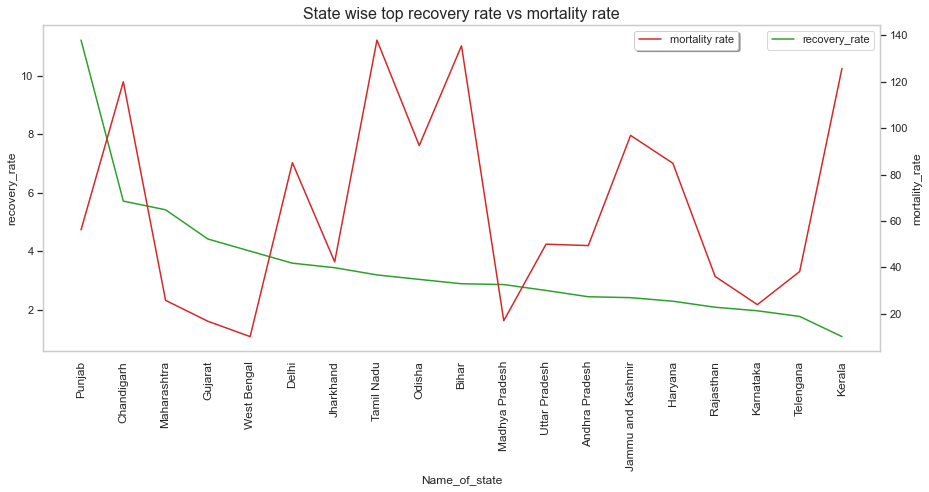

In [400]:
df_plot =  df1.sort_values("recovery_rate",ascending=False)
df_plot= df_plot[df_plot["Total_confirmed_cases"] > 100]
fig, x1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
x1.grid(False)
x1.set_title('State wise top recovery rate vs mortality rate', fontsize=16)
x1 = sns.lineplot(x="Name_of_state",
                         y="recovery_rate",
                         data = df_plot,color=color,sort=False
                         )
plt.xticks(fontsize=12, rotation=90)
x1.legend(['recovery_rate'])
#specify we want to share the same x-axis
x2 = x1.twinx()
x2.grid(False)
color = 'tab:red'
#line plot creation
x2 = sns.lineplot(x='Name_of_state', y='mortality_rate', data = df_plot,sort = False,color=color)
x2.legend(['mortality rate'],loc='upper left', bbox_to_anchor=(0.7, 1.00), shadow=True, ncol=2)
#show plot
plt.show()

## Conclusion: consider only total cases >  100 for all the Insights
Certain states have less mortality rate (high deaths) and high recovery rate (less cured cases) like Panjab,Madhya Pradesh, West Bengal,Gujarat and Maharashtra are worst effected need to check on recovery rate.

Certain countries have higher mortality rate (less deaths) and comparitively less recovery rate (high recovery cases) like Kerala,J&K,Tamil Nadu,Bihar,Odisha and Haryana are good in controlling the number of death cases and have progressive rocovery status.

Over all as total cases increases the number of recovery cases increases compared to death cases.

### Gender wise covid-19 cases

In [ ]:
# calling function to read and extract the number of tables in the web site
extract("https://globalhealth5050.org/covid19/#1586248980572-3839d9fe-3b88")

In [513]:
co=ws[0]

In [514]:
# to find the rows selections
rows=co.find_all("tr")[1:]
print(rows)

[<tr id="table_3_row_0">
<td style="">Australia </td>
<td style="">Yes</td>
<td style="">05.05.20</td>
<td style="">6,775</td>
<td style="">50</td>
<td style="">50</td>
<td style="">96</td>
<td style="">57</td>
<td style="">43</td>
<td style="">1.4%</td>
<td style="">1.6%</td>
<td style="">1.2%</td>
<td style="">1.3</td>
<td style=""><a href="http://www9.health.gov.au/cda/source/rpt_5.cfm" target="_blank"><button class="button1">Source</button></a></td>
</tr>, <tr id="table_3_row_1">
<td style="">Austria</td>
<td style="">Yes</td>
<td style="">05.05.20</td>
<td style="">15,585</td>
<td style="">49</td>
<td style="">51</td>
<td style="">606</td>
<td style="">57</td>
<td style="">43</td>
<td style="">3.9%</td>
<td style="">4.5%</td>
<td style="">3.3%</td>
<td style="">1.4</td>
<td style=""><a href="https://www.sozialministerium.at/Informationen-zum-Coronavirus/Neuartiges-Coronavirus-(2019-nCov).html" target="_blank"><button class="button1">Source</button></a></td>
</tr>, <tr id="table_3_

In [515]:
country = []
sex_disaggregated = []
#date = []
cases = []
cases_pct_male = []
cases_pct_female=[]
deaths =[]
deaths_pct_male=[]
deaths_pct_female=[]
death_cases_male=[]
death_cases_female=[]
death_male_female_ratio=[]

rows=co.find_all("tr")[1:]
for row in rows:
    col= row.find_all("td")
    country.append(col[0].text.strip())
    sex_disaggregated.append(col[1].text.strip())
    #date.append(col[2].text.strip())
    cases.append(col[3].text.strip())
    cases_pct_male.append(col[4].text.strip())
    cases_pct_female.append(col[5].text.strip())
    deaths.append(col[6].text.strip())
    deaths_pct_male.append(col[7].text.strip())
    deaths_pct_female.append(col[8].text.strip())
    death_cases_male.append(col[9].text.strip())
    death_cases_female.append(col[10].text.strip())
    death_male_female_ratio.append(col[11].text.strip())
print(country)

['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Czech Republic', 'Denmark', 'Ecuador', 'Finland', 'France', 'Germany', 'Greece', 'Indonesia', 'Iran', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Malaysia', 'Norway', 'Pakistan', 'Philippines', 'Poland', 'Portugal', 'Republic of Ireland', 'Romania', 'Russia', 'Saudi Arabia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'The Netherlands', 'Turkey', 'England and Wales', 'USA', 'Peru', 'Mexico', 'India', 'Northern Ireland', 'Scotland', 'Singapore', 'Qatar', 'Belarus', 'Dominican Republic', 'Ukraine', 'Panama', 'Argentina', 'Colombia', 'Egypt', 'UAE', 'South Africa', 'Serbia', 'Hungary', 'Moldova', 'Algeria', 'Bangladesh', 'Morocco', 'Kuwait', 'Cameroon', 'Oman', 'Croatia', 'Uzbekistan', 'Armenia', 'Iceland', 'Afghanistan', 'Iraq', 'Nigeria', 'Estonia', 'Azerbaijan', 'Ghana', 'Bahrain', 'Kazakstan', 'Kuwait', 'Bosnia and Herzegovina']


In [516]:
df2= pd.DataFrame(list(zip(country,sex_disaggregated,cases,cases_pct_male,cases_pct_female,deaths,deaths_pct_male,deaths_pct_female,death_cases_male,death_cases_female,death_male_female_ratio)),columns = ["country","sex_disaggregated","cases","cases_pct_male","cases_pct_female"
                                                                                                             ,"deaths","deaths_pct_male","deaths_pct_female","death_cases_male","death_cases_female","death_male_female_ratio"])
df2.head()

,country,sex_disaggregated,cases,cases_pct_male,cases_pct_female,deaths,deaths_pct_male,deaths_pct_female,death_cases_male,death_cases_female,death_male_female_ratio
0,Australia,Yes,"6,775",50,50,96,57,43,1.4%,1.6%,1.2%
1,Austria,Yes,"15,585",49,51,606,57,43,3.9%,4.5%,3.3%
2,Belgium,Yes,"50,320",37,63,"5,647",51,49,11.2%,15.6%,8.7%
3,Brazil,Partial,"61,888",,,"3,611",59,41,,,
4,Canada,Yes,"32,531",45,55,"1,590",47,53,4.9%,5.2%,4.7%


In [517]:
#From the data set we are just trying to compare the deaths among female and male cases.
#excluding all the co-related missing fields fron the dataset by removing "partial" and "no" items from sex_disaggregated column.
df2=df2[df2["sex_disaggregated"]=="Yes"]

In [518]:
#summary of the number of NaN values in a column
df2.isnull().sum()

country                    0
sex_disaggregated          0
cases                      0
cases_pct_male             0
cases_pct_female           0
deaths                     0
deaths_pct_male            0
deaths_pct_female          0
death_cases_male           0
death_cases_female         0
death_male_female_ratio    0
dtype: int64

In [519]:
# calling function to replace the '%' and ','
replace(df2)

In [520]:
df2.head()

,country,sex_disaggregated,cases,cases_pct_male,cases_pct_female,deaths,deaths_pct_male,deaths_pct_female,death_cases_male,death_cases_female,death_male_female_ratio
0,Australia,Yes,6775,50,50,96,57,43,1.4,1.6,1.2
1,Austria,Yes,15585,49,51,606,57,43,3.9,4.5,3.3
2,Belgium,Yes,50320,37,63,5647,51,49,11.2,15.6,8.7
4,Canada,Yes,32531,45,55,1590,47,53,4.9,5.2,4.7
6,China,Yes,55924,51,49,2114,64,36,3.8,4.7,2.8


In [521]:
df2[["cases","cases_pct_male","cases_pct_female","deaths","deaths_pct_male","deaths_pct_female"]] = df2[["cases","cases_pct_male","cases_pct_female","deaths","deaths_pct_male","deaths_pct_female"]].astype(int)

In [522]:
df2[["death_cases_male","death_cases_female","death_male_female_ratio"]] = df2[["death_cases_male","death_cases_female",
"death_male_female_ratio"]].astype(float)

In [523]:
df2.dtypes

country                     object
sex_disaggregated           object
cases                        int32
cases_pct_male               int32
cases_pct_female             int32
deaths                       int32
deaths_pct_male              int32
deaths_pct_female            int32
death_cases_male           float64
death_cases_female         float64
death_male_female_ratio    float64
dtype: object

Text(0.5, 1.0, 'Death cases of male to female ratio')

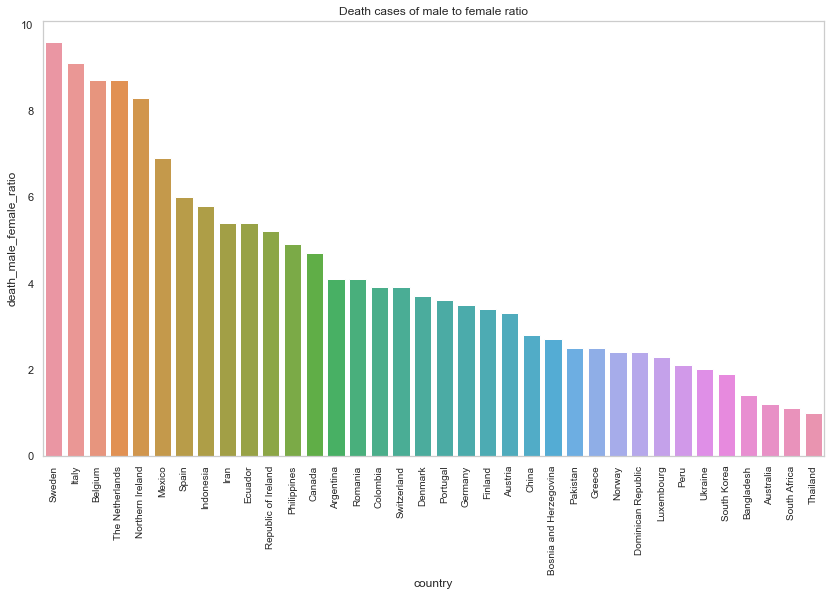

In [524]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(14,8))
df_plot =  df2.sort_values("death_male_female_ratio",ascending=False)
ax = sns.barplot(x="country", y="death_male_female_ratio", data=df_plot)
ax.grid(False)
plt.xticks(fontsize=10, rotation=90)
plt.title("Death cases of male to female ratio")

### Inference from above:
From the above it infers that less than one ratio will have more female deaths than male, however in most of the cases we have more male deaths than female.

### Conclusion:  Female have high mortality rate (less death cases) than male.